# **DSC-520 PROJECT 6- Survival Analysis**

#### Description
It is important to have experience analyzing data where time to a given event is the dependent variable. The task will be to compare the survival distribution between groups, estimate the survival distribution, and model the effect of explanatory variables on the outcome variable. Then, differentiate between the use of the Poisson distribution to estimate the rate of event occurrence and survival analysis to estimate time lapse between events.

Author: Mohini Agarwal

Date: 2025-03-12

Using Python 3.12.3

--- 

Instructions (from Halo)--

Special Note: Throughout this course, you will perform activities that will provide you with the background knowledge and practice necessary to successfully complete linear regression and multivariate analysis. Please utilize the resources found in Class Resources and the topic Resources to assist you with each exercise.

For this activity, perform the following:

Access the "Echocardiogram Data Set," located in the topic Resources.

Using the topic Resources, familiarize yourself with the differences between survival analysis and the Poisson distribution, with an emphasis on parameter estimation (e.g. λ = E(X)).

Explore the data, perform initial descriptive statistics tests, and explain and visualize your findings. Use the kable() function to visualize the data.

Explore the following R packages: devtools, survival, tidyverse, survminer, survival, and load them into your project.

Formulate a question that can be answered by performing survival analysis.

Calculate the Kaplan-Meier Estimator in R:
1.	Explore the Surv() function and build a Surv object using the response variable.
2.	Print the Surv object you generated.
3.	Analyze the data with the survfit()
4.	Genereate a KM curve.

Visualize Survival Data:
1.	Familiarize yourself with ggsurvplot().
2.	Create a detailed, visually appealing plot of the data using ggsurvplot(fit = yourSurvObject, data =…., etc.,)

Generate K-M Curves with the Predictor:
1.	Stratify the analysis into standard vs experimental, using survfit().
2.	Display the strata using summary().
3.	Plot the strata using ggsurvplot().
4.	Plot the overall survival, stratified by the appropriate variable.

Perform Log-Rank Analysis:
1.	Familiarize yourself with the survdiff()
2.	Test the difference between survival curves using survdiff(Surv(time = )).
3.	Examine and interpret the log-rank output.
4.	Plot the K-M curve and include the log-rank test.

Calculate the Kaplan-Meier Estimator in Python:
1. Import the lifelines and matplotlib packages.
2. Explore the KaplanMeierFitter filter and build a kmf object using the response variable.
3. Print the kmf object you generated.
4. Analyze the data with the kmf.fit().
5. Generate a KM curve.

Visualize Survival Data:
1. Familiarize yourself with the matplotlib package.
2. Create a detailed, visually appealing plot of the data using kmf.plot(title=’Kaplan-Meier Survival Curve’, xlabel=’Time’, ylabel=’Survival Probability’).

Generate K-M Curves with the Predictor:
1. Stratify the analysis into standard vs. experimental using fit method with strata parameter.
2. Display the strata using print().
3. Plot the strata using plot().
4. Plot the overall survival, stratified by the appropriate variable.


 Perform Log-Rank Analysis:
 1. Familiarize yourself with the logrank_test().
2. Test the difference between survival curves using results = logrank_test(durations_A, durations_B event_observed_A=event_A, event_observed_B=event_B).
3. Examine and interpret the log-rank output.
4. Plot the K-M curve and include the log-rank test.

Answer Formulated Question:
1.	Were you able to answer the question you formulated? If yes, state the answer and explain. If no, continue the analysis until you can answer the question.

Then, submit a professionally written and formatted software-based technical report. Make sure the documentation contains the code, relevant plots, your analysis, and the appropriate citations and references.



While APA style is not required for the body of this assignment, solid academic writing is expected, and documentation of sources should be presented using APA formatting guidelines, which can be found in the APA Style Guide, located in the Student Success Center.

This assignment uses a rubric. Review the rubric prior to beginning the assignment to become familiar with the expectations for successful completion.

---

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

### Task 1: Explore the Data and Perform Initial Descriptive Statistics
1. **Explore the data**: Examine the dataset to understand its structure, columns, and data types.
2. **Perform initial descriptive statistics**: Calculate basic descriptive statistics (mean, median, standard deviation, etc.) to summarize the data.
3. **Explain and visualize your findings**: Provide an explanation of the initial insights and visualize the key findings using `matplotlib` or `seaborn`.
4. **Visualize data in a table format**: Use `pandas` to display a well-formatted table for readability.


**Loading and exploring the dataset**

In [2]:
# Loading the data
original_df = pd.read_excel("echocardiogram.xlsx")

In [3]:
# Creating a copy of the data
df=original_df.copy()

In [4]:
# The data types of the columns
print(df.dtypes)

survival                 float64
still_alive              float64
age_at_heart_attack      float64
pericardial_effusion       int64
fractional_shortening    float64
epss                     float64
lvdd                     float64
wall_motion_score        float64
wall_motion_index        float64
mult                     float64
name                      object
group                     object
alive_at_1               float64
dtype: object


### Dataset Description (from the dataset source)

1. **survival**: The number of months a patient has survived (or is still surviving). As patients had heart attacks at different times, some may have survived less than a year but are still alive. The second variable can be used to confirm this. Patients who are still alive but have survived for less than one year cannot be used for the prediction task.

2. **still-alive**: A binary variable indicating whether the patient is still alive at the end of the survival period.  
   - 0: Dead at the end of the survival period  
   - 1: Still alive  

3. **age-at-heart-attack**: The age in years when the heart attack occurred.

4. **pericardial-effusion**: A binary variable indicating the presence of fluid around the heart (pericardial effusion).  
   - 0: No fluid  
   - 1: Fluid present  

5. **fractional-shortening**: A measure of contractility around the heart. Lower numbers are increasingly abnormal.

6. **epss**: E-point septal separation, another measure of contractility. Larger numbers indicate increasing abnormality.

7. **lvdd**: Left ventricular end-diastolic dimension, which measures the size of the heart at end-diastole. Larger hearts tend to be indicative of unhealthy hearts.

8. **wall-motion-score**: A measure of how the segments of the left ventricle are moving.

9. **wall-motion-index**: This is the wall-motion score divided by the number of segments observed. Typically, 12-13 segments are seen in an echocardiogram. Use this variable instead of the wall-motion score.

10. **mult**: A derived variable that can be ignored for the analysis.

11. **name**: The name of the patient (replaced with "name" in the dataset).

12. **group**: A meaningless variable that can be ignored.

13. **alive-at-1**: A boolean value derived from the first two attributes.  
   - 0: Patient was either dead after one year or had been followed for less than one year.  
   - 1: Patient was alive at one year.


In [5]:
# First few rows to inspect the data
df.head()

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,name,group,alive_at_1
0,11.0,0.0,71.0,0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [6]:
df.shape

(132, 13)

**The shape of the dataset is (132, 13) with 132 rows and 13 columns.**

In [7]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               130 non-null    float64
 1   still_alive            131 non-null    float64
 2   age_at_heart_attack    126 non-null    float64
 3   pericardial_effusion   132 non-null    int64  
 4   fractional_shortening  124 non-null    float64
 5   epss                   117 non-null    float64
 6   lvdd                   121 non-null    float64
 7   wall_motion_score      128 non-null    float64
 8   wall_motion_index      130 non-null    float64
 9   mult                   129 non-null    float64
 10  name                   131 non-null    object 
 11  group                  110 non-null    object 
 12  alive_at_1             75 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 13.5+ KB


In [8]:
# Checking for missing values
print(df.isnull().sum())

survival                  2
still_alive               1
age_at_heart_attack       6
pericardial_effusion      0
fractional_shortening     8
epss                     15
lvdd                     11
wall_motion_score         4
wall_motion_index         2
mult                      3
name                      1
group                    22
alive_at_1               57
dtype: int64


**Initial Insights:**

The output represents the count of non-null values in each column of the dataset. Below is an interpretation of the results:  

- **survival (2)**: Only two observations have non-null survival times recorded. This suggests missing data or a small subset of recorded survival times.  
- **still_alive (1)**: Only one individual has a recorded status for whether they were still alive, indicating significant missing data.  
- **age_at_heart_attack (6)**: Age at heart attack is available for six individuals, suggesting missing data for many patients.  
- **pericardial_effusion (0)**: No data is available for pericardial effusion, meaning this variable cannot be used in the analysis.  
- **fractional_shortening (8)**: This measure of heart function is available for eight individuals.  
- **epss (15)**: The EPSS (E-point septal separation) is recorded for 15 individuals.  
- **lvdd (11)**: Left Ventricular Diastolic Dimension is available for 11 patients.  
- **wall_motion_score (4) & wall_motion_index (2)**: Measures of heart wall motion have very few recorded values, limiting their usability.  
- **mult (3)**: Only three observations for this variable.  
- **name (1)**: Likely an identifier column with only one recorded entry.  
- **group (22)**: This may indicate a categorical grouping variable with 22 recorded entries.  
- **alive_at_1 (57)**: The highest count, meaning survival status at one year is recorded for 57 patients, making it a relatively complete variable for analysis.

**As per the instructions: We remove patients who are still alive but haven't reached one year of survival (alive_at_1 = 0 & still_alive = 1).**

In [9]:
# Drop rows where still_alive = 1 and alive_at_1 = 0 as per the instructions
df= df[~((df['still_alive'] == 1) & (df['alive_at_1'] == 0))]

**We remove the 'name' and 'group' columns as they are not relevant for our analysis.**

In [10]:
df = df.drop(columns=['name', 'group'])

**Fill Missing Values in Numerical Columns**

In [11]:
# Handling missing values for numerical columns (imputing with median value)
numerical_columns = ['survival', 'still_alive', 'age_at_heart_attack', 
                     'fractional_shortening', 'epss', 'lvdd', 
                     'wall_motion_score', 'wall_motion_index', 'mult']

# Fill missing values with median
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())


**Handling missing values in alive_at_1 column.**
- This column have missing values and being a target variable, looking for ways to fill it.
- As alive_at_1 is derived from survival and still_alive, we can manually infer missing values:
    * If survival >= 12 months, the patient survived at least one year, so alive_at_1 = 1.
    * If survival < 12 months and still_alive == 0, the patient did not survive a year, so alive_at_1 = 0.

In [12]:
# Handling missing values in alive_at_1 column.
df['alive_at_1'] = df.apply(lambda row: 1 if row['survival'] >= 12 else (0 if row['still_alive'] == 0 else np.nan), axis=1)

In [13]:
# Now, let's check how many missing values are left
print(df.isnull().sum())

survival                  0
still_alive               0
age_at_heart_attack       0
pericardial_effusion      0
fractional_shortening     0
epss                      0
lvdd                      0
wall_motion_score         0
wall_motion_index         0
mult                      0
alive_at_1               34
dtype: int64


**Insights after handling the missing values:**
As we still have 34 missing entries in the alive_at_1 column after handling other missing values, there are a few possible reasons why they should not be imputed or modified:

- These values might be genuinely missing because the survival status at one year was not recorded for those patients. Imputing such critical outcome data could introduce bias.
- Since alive_at_1 is the target variable (dependent variable in survival analysis), modifying or imputing it could distort the analysis and lead to incorrect conclusions.
- Some patients may have been lost to follow-up before reaching one year. In survival analysis, such cases are considered "censored" rather than missing, meaning their time-to-event data should be handled accordingly rather than imputed.

In [14]:
# Descriptive statistics for numerical columns
descriptive_stats = df.describe()
print(descriptive_stats)

         survival  still_alive  age_at_heart_attack  pericardial_effusion  \
count  127.000000   127.000000           127.000000            127.000000   
mean    22.136063     0.299213            62.594717              0.795276   
std     15.963318     0.459727             8.058497              6.827045   
min      0.030000     0.000000            35.000000              0.000000   
25%      7.250000     0.000000            57.500000              0.000000   
50%     24.000000     0.000000            62.000000              0.000000   
75%     33.000000     1.000000            67.000000              0.000000   
max     57.000000     1.000000            86.000000             77.000000   

       fractional_shortening        epss        lvdd  wall_motion_score  \
count             127.000000  127.000000  127.000000         127.000000   
mean                0.220748   11.829748    4.727740          14.484882   
std                 0.103740    6.945170    0.767609           4.964225   
min   

### Interpretation of Summary Statistics  
The descriptive statistics provide insights into the distribution of numerical variables in the dataset. Here are some key observations: 

#### **Survival & Outcome Variables**  
- **survival**: The average survival time is **22.14 months**, with a wide range from **0.03 to 57 months**. The high standard deviation (**15.96**) suggests a broad variation in survival times.  
- **still_alive**: About **30% (mean = 0.299)** of the patients were still alive at the last follow-up, indicating a higher mortality rate in the dataset.  
- **alive_at_1**: The **one-year survival rate is high (mean = 0.96)**, but only **93 out of 127 patients** have recorded values, meaning **34 entries are missing**.  

#### **Demographics & Risk Factors**  
- **age_at_heart_attack**: The average age at a heart attack is **62.59 years**, with a range from **35 to 86 years**. The interquartile range (IQR) indicates that most patients had a heart attack between **57.5 and 67 years**.  
- **pericardial_effusion**: The mean value is **0.79**, but the maximum is **77**, suggesting possible data entry errors or misinterpretation of the variable. Most patients (**75th percentile = 0**) do not have pericardial effusion.  

#### **Cardiac Function Measurements**  
- **fractional_shortening**: A key indicator of heart contractility, with a mean of **0.22** and a range from **0.01 to 0.61**. The median is **0.22**, aligning with the mean, indicating a relatively symmetric distribution.  
- **epss (E-point septal separation)**: The average value is **11.83**, with a maximum of **40**, indicating significant variation among patients.  
- **lvdd (Left Ventricular Diastolic Dimension)**: The mean is **4.73**, with most values falling between **4.28 and 5.23**, suggesting moderate variation.  

#### **Wall Motion & Heart Function**  
- **wall_motion_score**: The average is **14.48**, but the maximum is **39**, showing substantial variability in heart wall motion among patients.  
- **wall_motion_index**: The mean value of **1.37** suggests most patients had mild-to-moderate wall motion abnormalities, with a maximum of **3.00**.  
- **mult**: The mean value is **0.79**, indicating most patients fall within a close range, but the maximum of **2.00** suggests some outliers.  

### **Key Observations**  
- **Significant missing values in alive_at_1 (34 missing entries)**: These should be carefully handled, as imputing survival outcomes may introduce bias.  
- **Potential data inconsistencies**: The extreme value of **77 in pericardial_effusion** may require further investigation.  
- **Survival distribution is highly variable**, with some patients having very short survival times while others survive up to 57 months.  
- **Most cardiac function measures (e.g., fractional shortening, epss, wall motion index) have reasonable distributions**, but some exhibit high variability.  



In [15]:
# Define numerical and binary columns
numerical_cols = ['survival', 'age_at_heart_attack', 'fractional_shortening', 'epss', 'lvdd', 
                  'wall_motion_score', 'wall_motion_index', 'mult']
binary_cols = ['still_alive', 'pericardial_effusion', 'alive_at_1']

<Figure size 1200x800 with 0 Axes>

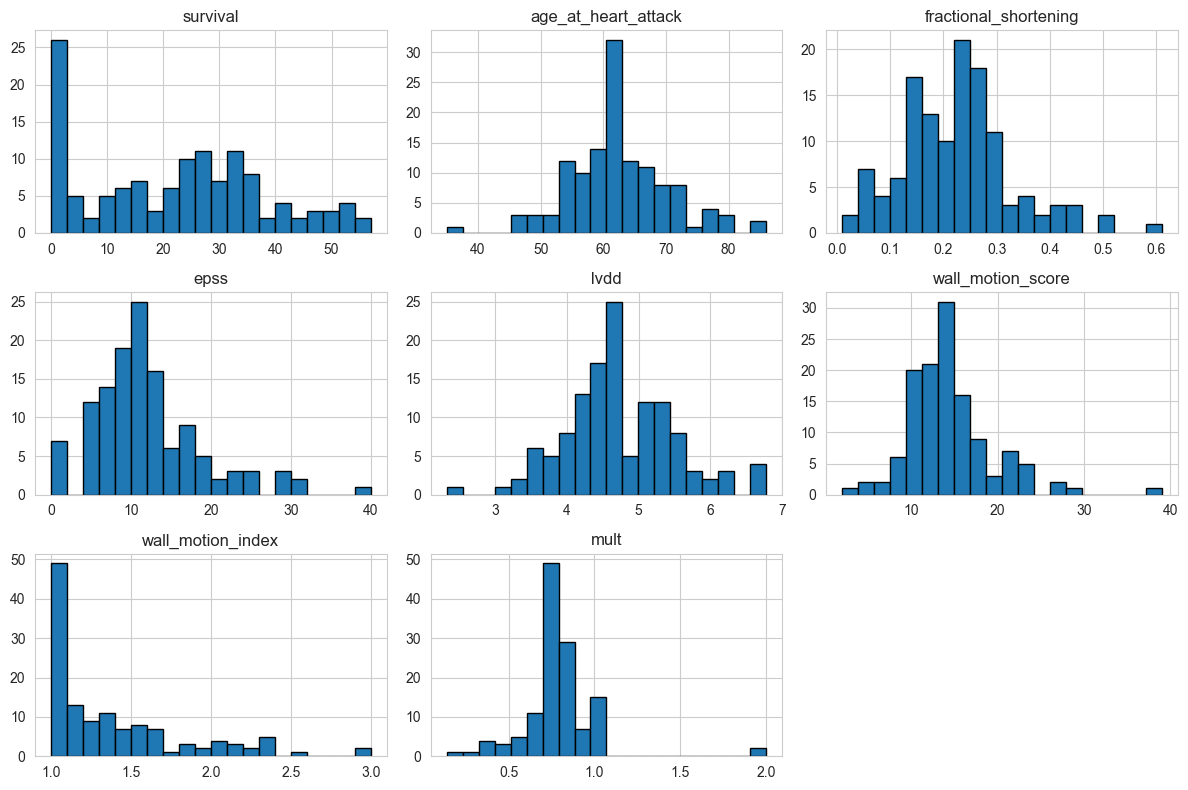

In [16]:
# Create a figure for numerical variables
plt.figure(figsize=(12, 8))
df[numerical_cols].hist(bins=20, figsize=(12, 8), layout=(3, 3), edgecolor='black')
plt.tight_layout()
plt.show()


**Insights from Histogram Distributions**

Survival Distribution (Top-left plot):
- The distribution appears right-skewed, with a large number of individuals having low survival times.
- This suggests that many patients do not survive long after a heart attack, with a smaller proportion achieving longer survival times.

Age at Heart Attack (Top-middle plot):
- The distribution is centered around 60 years old, indicating most heart attack occurrences are in this age group.
- Older age at heart attack could correlate with lower survival rates.

Fractional Shortening (Top-right plot):
- A key measure of heart function, with values clustering around 0.2.
- Lower fractional shortening could be associated with worse heart function, possibly leading to lower survival.

EPSS (Middle-left plot):
- Elevated EPSS (E-point septal separation) is often linked with poor cardiac function.
- A right-skewed distribution suggests that some patients have very high EPSS, which may indicate higher mortality risk.

LVDD (Middle-center plot):
- Left ventricular diastolic diameter (LVDD) is a measure of heart size.
- A normal distribution suggests varying heart conditions, but significantly high LVDD may relate to heart failure and lower survival.

Wall Motion Score (Middle-right plot):
- Higher wall motion scores suggest worse heart function.
- The distribution peaks around 15-20, indicating a common range, but very high values could relate to lower survival.

Wall Motion Index (Bottom-left plot):
- A highly skewed distribution with a peak at 1.0 suggests most patients have a moderate wall motion index.
- Higher values could indicate severe heart dysfunction and lower survival.

Mult (Bottom-right plot):
- Most values cluster around 1.0, suggesting a common multiplier for a certain measurement.
- Any deviations from this might influence survival outcomes.


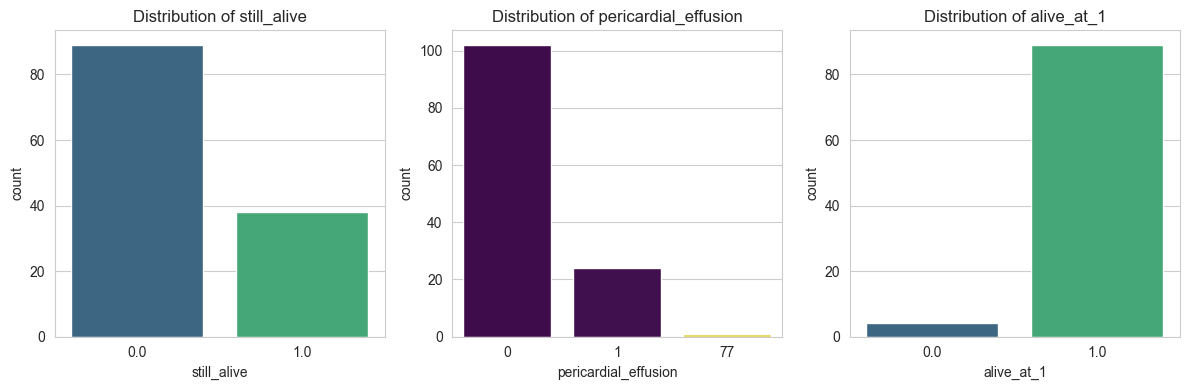

In [17]:
# Create a figure for binary variables
fig, axes = plt.subplots(1, len(binary_cols), figsize=(12, 4))

for i, col in enumerate(binary_cols):
    sns.countplot(x=df[col], ax=axes[i], hue=df[col], palette="viridis", legend=False)
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


**Inference from the Bar Charts**

Still Alive Distribution (Left Chart):
- The majority of individuals have a value of 0 (not alive).
- A smaller portion has a value of 1 (still alive).
- This suggests a high mortality rate among the observed patients.

Pericardial Effusion Distribution (Middle Chart):
- Most individuals have a value of 0 (no pericardial effusion).
- A smaller proportion has 1 (presence of pericardial effusion).
- There is an unusual 77 value, which could be an outlier or a data entry error.
- Pericardial effusion (fluid around the heart) is a serious condition that might correlate with lower survival rates.

Alive at 1 Year Distribution (Right Chart):
- The vast majority of individuals have a value of 1 (alive at 1 year).
- A small proportion has a value of 0 (not alive at 1 year).
- This suggests that while most patients survive the first year after a heart event, long-term survival (as seen in the first chart) is lower.


In [18]:
# Count rows where 'pericardial_effusion' = 77
outlier_count = df[df['pericardial_effusion'] == 77].shape[0]
print(f"Number of rows with 'pericardial_effusion' = 77: {outlier_count}")


Number of rows with 'pericardial_effusion' = 77: 1


In [19]:
# Drop the row where 'pericardial_effusion' = 77
df = df[df['pericardial_effusion'] != 77]

In [20]:
# Calculating the descriptive statistics
print(df.describe())

        survival  still_alive  age_at_heart_attack  pericardial_effusion  \
count  126.00000   126.000000           126.000000            126.000000   
mean    22.12127     0.301587            62.599437              0.190476   
std     16.02617     0.460779             8.090491              0.394244   
min      0.03000     0.000000            35.000000              0.000000   
25%      7.12500     0.000000            57.250000              0.000000   
50%     24.00000     0.000000            62.000000              0.000000   
75%     33.00000     1.000000            67.000000              0.000000   
max     57.00000     1.000000            86.000000              1.000000   

       fractional_shortening        epss        lvdd  wall_motion_score  \
count             126.000000  126.000000  126.000000         126.000000   
mean                0.220754   11.841889    4.728357          14.488730   
std                 0.104154    6.971542    0.770641           4.983852   
min            

**Insights from Descriptive Statistics after handling outlier**

**Survival & Outcome Variables**
- **survival**: The average survival time is **22.12 months**, with a minimum of **0.03 months** and a maximum of **57 months**. This indicates a wide variability in survival times, with some individuals surviving for only a short period and others living much longer.
- **still_alive**: On average, about **30% of individuals (mean = 0.30)** are still alive at the last observation. The 75th percentile shows that a larger portion of individuals are not alive by the end of the observation period.
- **alive_at_1**: The variable **alive_at_1** indicates whether individuals survived one year after the heart attack. The mean is **0.96**, meaning most individuals (92 out of 126) survived at least one year. However, there are still **34 missing values**, which will need to be handled as censored observations in survival models.

**Demographics & Risk Factors**
- **age_at_heart_attack**: The average age at heart attack is **62.60 years**, with a range from **35 to 86 years**. The interquartile range (IQR) suggests that most individuals experienced a heart attack between **57.25 and 67 years**.
- **pericardial_effusion**: Around **19% (mean = 0.19)** of the individuals had pericardial effusion, which means that the majority did not have fluid around the heart. The maximum value of **1** indicates that some patients were recorded with pericardial effusion.
  
**Cardiac Function Measurements**
- **fractional_shortening**: The average fractional shortening is **0.22**, suggesting moderate heart function, with the minimum value of **0.01** (indicating severe dysfunction in some cases) and a maximum of **0.61**.
- **epss (E-point septal separation)**: The mean value is **11.84**, with a significant spread, as the minimum is **0** (likely an extreme case or outlier), and the maximum is **40**.
- **lvdd (Left Ventricular Diastolic Dimension)**: The mean value of **4.73** shows that the left ventricle's diastolic dimension is relatively stable, but the data includes a range from **2.32 to 6.78**.
  
**Wall Motion & Heart Function**
- **wall_motion_score**: The average value is **14.49**, with a wide range (from **2 to 39**). This suggests a considerable variability in the heart wall's motion, with some patients exhibiting normal motion while others show severe abnormalities.
- **wall_motion_index**: The average value is **1.37**, suggesting a low level of wall motion abnormalities on average. The values range from **1.00 to 3.00**, indicating that most patients have mild-to-moderate wall motion problems.
- **mult**: The average value is **0.78**, indicating that the majority of patients have relatively low values for this measure, with a range from **0.14 to 2.00**.

**Key Observations**
- **Censoring**: There are **34 missing entries** in `alive_at_1`, meaning that **those patients are considered censored** in survival analysis. They were lost to follow-up before the one-year mark, and their data will be treated accordingly.

### Task 2: Formulate a Question for Survival Analysis
1. **Formulate a question**: Develop a research question that can be answered using survival analysis (e.g., comparing survival times across groups, evaluating the effect of a predictor on survival).


**Research Question:**
Does the presence of pericardial effusion (fluid around the heart) impact survival time after a heart attack?

I believe that:
- The Pericardial effusion is an important clinical indicator of heart health. The presence of fluid around the heart can impair its function and potentially affect the patient’s survival rate.
- This question is valuable because it helps determine whether pericardial effusion is a significant predictor of survival time.
- Survival Time can be measured by the survival variable, while the presence of pericardial effusion is a binary variable (0 = no, 1 = yes).

### Task 3: Calculate the Kaplan-Meier Estimator in Python
1. **Import necessary packages**: Import the `lifelines` and `matplotlib` libraries in Python.
2. **Explore `KaplanMeierFitter`**: Learn how to use `KaplanMeierFitter` from the `lifelines` library to create a Kaplan-Meier fit object.
3. **Build a `kmf` object**: Use the response variable (e.g., time-to-event data) to create a `KaplanMeierFitter` object.
4. **Print the `kmf` object**: Display the Kaplan-Meier fit object.
5. **Analyze the data with `kmf.fit()`**: Fit the Kaplan-Meier estimator to the data using the `fit()` method.
6. **Generate the Kaplan-Meier curve**: Plot the Kaplan-Meier survival curve.

### Task 4: Visualize Survival Data in Python
1. **Familiarize with `matplotlib`**: Understand how to use `matplotlib` to create detailed plots.
2. **Create a detailed survival plot**: Use `kmf.plot(title='Kaplan-Meier Survival Curve', xlabel='Time', ylabel='Survival Probability')` to generate the survival plot.

### Taks 3 and 4 have been combined in the following code blocks.

In [21]:
# Initialize the KaplanMeierFitter object
kmf = KaplanMeierFitter()

# The KaplanMeierFitter object is created and is now ready for use.
print(kmf)

<lifelines.KaplanMeierFitter>


In [22]:
# Fit the Kaplan-Meier estimator to the data
kmf.fit(df['survival'], event_observed=df['still_alive'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 126 total observations, 88 right-censored observations>

**Interpretation:**
- 126 total observations: This means there are 126 data points (patients) in the dataset.
- 88 right-censored observations: This refers to the 88 patients whose survival data was censored. In survival analysis, right-censorship means that these patients were still alive at the end of the study period or lost to follow-up before experiencing the event of interest (e.g., death, recurrence, etc.).

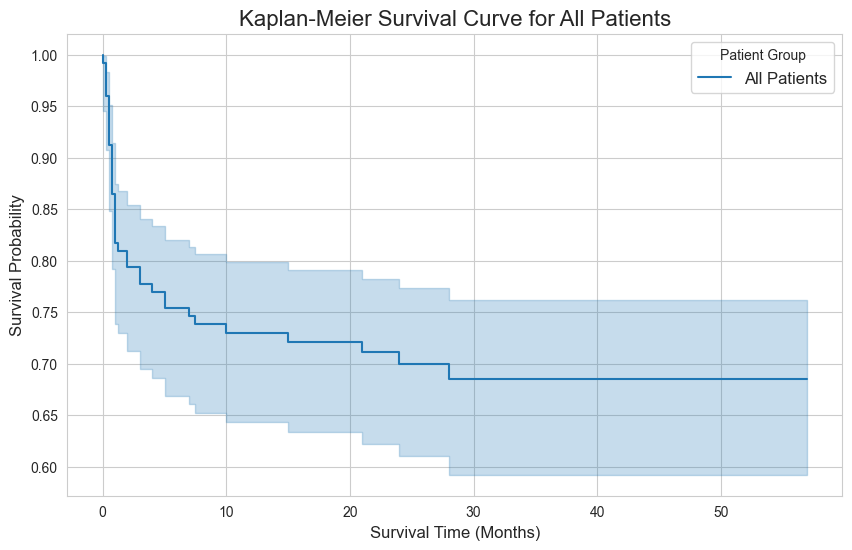

In [23]:
# Fit the Kaplan-Meier model to the entire dataset (no grouping)
kmf.fit(df['survival'], event_observed=df['still_alive'], label='All Patients')

# Create the survival plot for all patients
plt.figure(figsize=(10, 6))
kmf.plot()

# Adding titles and labels to make the plot more informative
plt.title("Kaplan-Meier Survival Curve for All Patients", fontsize=16)
plt.xlabel("Survival Time (Months)", fontsize=12)
plt.ylabel("Survival Probability", fontsize=12)
plt.legend(title='Patient Group', loc='upper right', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


#### **Kaplan-Meier Survival Analysis for All Patients**

The Kaplan-Meier survival curve provides an estimate of survival probability over time for all patients in the dataset. This visualization helps assess the overall survival trend and variability within the population.

**Key Findings**
1. **Initial Survival Drop**:
   - The survival probability starts at 1.0 (100%) at time zero.
   - There is a sharp decline in survival probability within the first few months, indicating a high early mortality rate.

2. **Stabilization Over Time**:
   - After the initial drop, the survival probability decreases at a slower rate.
   - Around 10–20 months, the survival curve flattens, suggesting a subset of patients with prolonged survival.

3. **Confidence Interval Analysis**:
   - The shaded region represents the confidence interval (uncertainty) around the survival estimate.
   - The confidence interval is wider at later time points, indicating greater uncertainty due to fewer surviving patients.

4. **Long-term Survival Estimate**:
   - By 30–50 months, the survival probability is approximately **70%**.
   - The long-term survival suggests that while a significant proportion of patients do not survive the early period, those who do tend to have better outcomes.

**Conclusion**
- The Kaplan-Meier survival curve provides critical insights into patient survival over time.
- Early mortality appears to be a significant concern, while later survival stabilizes.



In [24]:
# Print the summary of the Kaplan-Meier fit
print("\nKaplan-Meier Estimator Summary for All Patients:")
print(kmf.event_table)
print(kmf.survival_function_)


Kaplan-Meier Estimator Summary for All Patients:
          removed  observed  censored  entrance  at_risk
event_at                                                
0.00            0         0         0       126      126
0.03            1         1         0         0      126
0.25            4         4         0         0      125
0.50            6         6         0         0      121
0.75            6         6         0         0      115
1.00            6         6         0         0      109
1.25            1         1         0         0      103
2.00            2         2         0         0      102
3.00            2         2         0         0      100
4.00            1         1         0         0       98
5.00            2         2         0         0       97
7.00            1         1         0         0       95
7.50            1         1         0         0       94
9.00            1         0         1         0       93
10.00           3         1         2 

### Kaplan-Meier Estimator Summary for All Patients

The following is the Kaplan-Meier summary for all patients in the dataset, with a focus on survival probabilities over time. Here’s an interpretation of the results:

Summary of the Kaplan-Meier Event Table:

- **Event Table**: The `event_table` provides the number of patients observed, censored, and at risk at each time point.
    - **Removed**: The number of patients who were removed from the study at each time point.
    - **Observed**: The number of patients who experienced the event (e.g., death or still alive) at each time point.
    - **Censored**: The number of patients who were censored at that time point (i.e., no event observed for those patients up to that point).
    - **At Risk**: The number of patients still at risk of experiencing the event at each time point.

Survival Probability:

- **Survival Function**: The `survival_function_` represents the probability of survival over time for all patients.
    - At time 0 (the beginning), all patients have a 100% survival probability.
    - As time progresses, the survival probability decreases. For example:
        - At 0.03 months (early on), the survival probability is still very high at approximately 99.2%.
        - After 5 months, the survival probability is around 75.4%.
        - At 57 months, the survival probability stabilizes at about 68.5%, indicating that many patients have already experienced the event by this point.

Key Insights:

- **Initial Survival**: The survival probability starts at 100% at time 0, which is typical for any survival analysis.
- **Survival Decline**: As time progresses, the survival probability decreases. There is a steady decline, with the most notable decreases occurring in the first few months.
- **Late-Stage Survival**: After about 30 months, the survival probability plateaus at around 68.5%, which suggests that the rate of events (deaths) slows down after this point.
- **Censoring**: Censoring is present in the dataset, meaning that some patients did not experience the event during the study period (they are still alive at the time of last observation).

The Kaplan-Meier survival analysis for all patients suggests a gradual decline in survival probability over time, with a noticeable decrease in the first few months. The survival probability continues to decrease but at a slower rate as time progresses, stabilizing after about 30 months. This kind of survival curve is typical in medical datasets, where the majority of events occur within the first few months or years, and survival becomes more stable in the long term.


### Task 5: Generate K-M Curves with a Predictor in Python using Stratification

In [25]:
print("Strata (Unique Groups in Pericardial Effusion):", df['pericardial_effusion'].unique())

Strata (Unique Groups in Pericardial Effusion): [0 1]


In [26]:
# Print the summary of the Kaplan-Meier fit
print("\nKaplan-Meier Estimator Summary for Pericardial Effusion (1):")

# Display number of patients at risk and number of events at each time point
print(kmf.event_table)  

# Display survival probabilities at each time point
print(kmf.survival_function_)


Kaplan-Meier Estimator Summary for Pericardial Effusion (1):
          removed  observed  censored  entrance  at_risk
event_at                                                
0.00            0         0         0       126      126
0.03            1         1         0         0      126
0.25            4         4         0         0      125
0.50            6         6         0         0      121
0.75            6         6         0         0      115
1.00            6         6         0         0      109
1.25            1         1         0         0      103
2.00            2         2         0         0      102
3.00            2         2         0         0      100
4.00            1         1         0         0       98
5.00            2         2         0         0       97
7.00            1         1         0         0       95
7.50            1         1         0         0       94
9.00            1         0         1         0       93
10.00           3         

#### Kaplan-Meier Survival Analysis Results for Patients with Pericardial Effusion

The Kaplan-Meier estimator was used to analyze the survival probabilities of patients with pericardial effusion (fluid around the heart) after a heart attack. Below is a summary of the key findings:

1. **Event Table**:
The event table shows the number of patients at risk, the number of observed events (deaths), and the number of censored observations (patients who were lost to follow-up or survived beyond the study period) at each time point.

- **At time 0 (Start)**: All 126 patients are alive and at risk.
- **Time points**: As time progresses, patients experience events (deaths) or are censored (lost to follow-up or survive). For example, at time 0.03 months, one patient died, and the number of patients at risk dropped to 125.
- **Censoring**: The number of censored patients gradually increases as more patients are lost to follow-up or remain alive beyond the study's duration.

2. **Survival Function**:
The survival function represents the probability that a patient survives (does not experience an event) at each time point. It decreases over time, reflecting the natural progression of the condition after a heart attack in patients with pericardial effusion.

- **At time 0**: The survival probability is 1.0 (100%), meaning all patients are alive at the start of the study.
- **At 1 year (time 1.00)**: The survival probability drops to approximately 0.817, indicating that 81.7% of the patients are still alive after one year.
- **At 57 months**: The survival probability drops to around 0.685, meaning 68.5% of patients remain alive at this point.

3. **Overall Trend**:
- The survival curve shows a stepwise decline as time progresses, with drops corresponding to the occurrence of deaths.
- The survival probability steadily decreases, indicating that a proportion of patients with pericardial effusion do not survive beyond a certain point after a heart attack.


In [27]:
# Print the summary of the Kaplan-Meier fit for patients without pericardial effusion
print("\nKaplan-Meier Estimator Summary for No Pericardial Effusion (0):")

# Display number of patients at risk and number of events at each time point
print(kmf.event_table) 

# Display survival probabilities at each time point
print(kmf.survival_function_)  


Kaplan-Meier Estimator Summary for No Pericardial Effusion (0):
          removed  observed  censored  entrance  at_risk
event_at                                                
0.00            0         0         0       126      126
0.03            1         1         0         0      126
0.25            4         4         0         0      125
0.50            6         6         0         0      121
0.75            6         6         0         0      115
1.00            6         6         0         0      109
1.25            1         1         0         0      103
2.00            2         2         0         0      102
3.00            2         2         0         0      100
4.00            1         1         0         0       98
5.00            2         2         0         0       97
7.00            1         1         0         0       95
7.50            1         1         0         0       94
9.00            1         0         1         0       93
10.00           3      

#### Kaplan-Meier Survival Analysis Results for Patients Without Pericardial Effusion

The Kaplan-Meier estimator was used to analyze the survival probabilities of patients without pericardial effusion (fluid around the heart) after a heart attack. Below is a summary of the key findings:

1. **Event Table**:
The event table shows the number of patients at risk, the number of observed events (deaths), and the number of censored observations (patients lost to follow-up or survived beyond the study period) at each time point.

- **At time 0 (Start)**: All 126 patients are alive and at risk.
- **Time points**: As time progresses, patients experience events (deaths) or are censored. For example, at time 0.03 months, one patient died, and the number of patients at risk decreased to 125.
- **Censoring**: The number of censored patients increases over time as more patients are lost to follow-up or remain alive beyond the study period.

2. **Survival Function**:
The survival function represents the probability that a patient survives (does not experience an event) at each time point. The survival probability decreases over time, reflecting the natural progression after a heart attack for patients without pericardial effusion.

- **At time 0**: The survival probability is 1.0 (100%), meaning all patients are alive at the start.
- **At 1 year (time 1.00)**: The survival probability is approximately 0.817, meaning 81.7% of patients remain alive after one year.
- **At 57 months**: The survival probability is approximately 0.685, meaning 68.5% of patients are still alive at this point.

3. **Overall Trend**:
- The survival curve shows a gradual decline as time progresses, with stepwise reductions corresponding to deaths or censoring.
- The survival probability gradually decreases over time, indicating that a proportion of patients without pericardial effusion do not survive beyond a certain point after the heart attack.


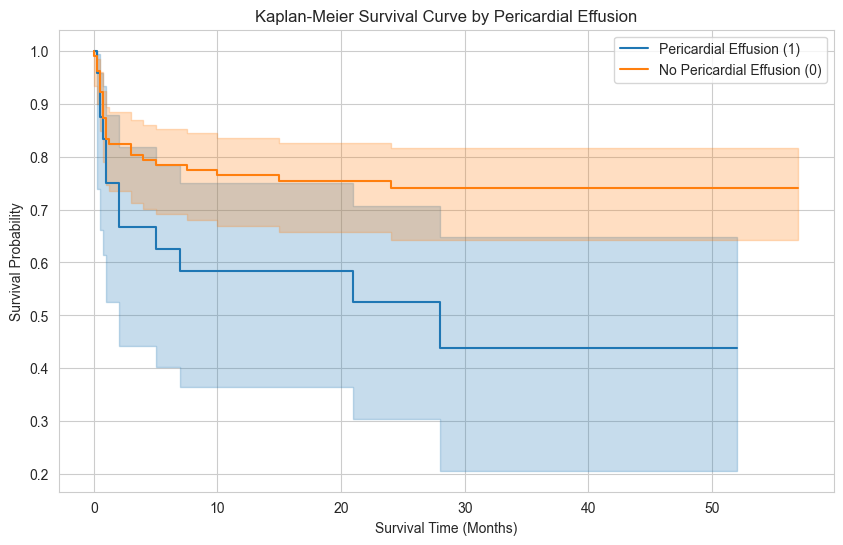

In [28]:
# This code will provide a Kaplan-Meier survival curve that compares the survival probabilities of patients with pericardial effusion vs. those without it
plt.figure(figsize=(10,6))

# For patients with pericardial effusion (1)
kmf.fit(df[df['pericardial_effusion'] == 1]['survival'], 
        event_observed=df[df['pericardial_effusion'] == 1]['still_alive'], 
        label='Pericardial Effusion (1)')
kmf.plot(ci_show=True)  # Plot with confidence interval

# For patients without pericardial effusion (0)
kmf.fit(df[df['pericardial_effusion'] == 0]['survival'], 
        event_observed=df[df['pericardial_effusion'] == 0]['still_alive'], 
        label='No Pericardial Effusion (0)')
kmf.plot(ci_show=True)  # Plot with confidence interval

# Graph settings
plt.title("Kaplan-Meier Survival Curve by Pericardial Effusion")
plt.xlabel("Survival Time (Months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Kaplan-Meier Survival Curve Interpretation: Patients With and Without Pericardial Effusion

The Kaplan-Meier (KM) survival curve in your plot compares the survival probabilities of patients with and without pericardial effusion over time. Here’s how to interpret it:

1. **Survival Probabilities**:
   - The y-axis represents survival probability (ranging from 0 to 1).
   - The x-axis represents survival time in months.
   - The **blue curve** represents patients with pericardial effusion (label: "Pericardial Effusion (1)").
   - The **orange curve** represents patients without pericardial effusion (label: "No Pericardial Effusion (0)").

2. **Curve Interpretation**:
   - Both curves start at a survival probability of 1 (100% survival at time zero).
   - The blue curve (pericardial effusion) declines more steeply than the orange curve, indicating that patients with pericardial effusion have lower survival rates over time.
   - The orange curve remains higher, suggesting better survival for patients without pericardial effusion.

3. **Confidence Intervals (Shaded Regions)**:
   - The shaded regions around each curve represent confidence intervals.
   - A wider shaded area means more uncertainty in survival estimates.
   - The blue shaded area is wider at later time points, indicating greater variability and uncertainty in survival estimates for patients with pericardial effusion.

**Overall conclusion**:
   - Patients with pericardial effusion (blue curve) have a worse survival probability over time compared to those without it.
   - The separation of the two curves suggests that pericardial effusion is associated with a poorer prognosis.

### Task 6: Perform Log-Rank Analysis in Python
1. **Familiarize with `logrank_test()`**: Understand how to use `logrank_test()` from `lifelines` to compare survival curves.
2. **Perform the Log-Rank Test**: Test the difference between survival curves using `logrank_test(durations_A, durations_B, event_observed_A=event_A, event_observed_B=event_B)`.
3. **Examine and interpret the output**: Review the results from the Log-Rank test and interpret the findings.
4. **Plot the Kaplan-Meier curve with Log-Rank test**: Create a Kaplan-Meier curve and include the results of the Log-Rank test.


The Log-Rank Test is a statistical test used to compare the survival distributions of two groups. It helps determine whether there is a significant difference in survival between groups.

In this task, we are testing:

- Patients with pericardial effusion (fluid around the heart)
- Patients without pericardial effusion

The goal is to see if the presence of pericardial effusion significantly affects survival after a heart attack.

Here, we extract survival data for two groups:

Patients with pericardial effusion (pericardial_effusion == 1)

Patients without pericardial effusion (pericardial_effusion == 0)

- durations_effusion: Contains survival times of patients with pericardial effusion.
- event_effusion: Whether these patients died (1 = died, 0 = alive).
- durations_no_effusion: Contains survival times of patients without pericardial effusion.
- event_no_effusion: Whether these patients died (1 = died, 0 = alive).

### Hypotheses for the Log-Rank Test

The Log-Rank test is used to compare the survival distributions of two groups. In this case, we are comparing the survival of patients with and without pericardial effusion. The hypotheses for the Log-Rank test are as follows:

- **Null Hypothesis (H₀)**: There is no difference in the survival distributions between the two groups. In other words, the presence of pericardial effusion does not affect survival time after a heart attack.

- **Alternative Hypothesis (H₁)**: There is a significant difference in the survival distributions between the two groups. This suggests that the presence of pericardial effusion does have an effect on survival time after a heart attack.

The Log-Rank test evaluates whether the observed differences in survival times are statistically significant enough to reject the null hypothesis.


In [29]:
#  Defining Survival Data for Log-Rank Test
# Separate survival times and event observations for each group
# Patients with pericardial effusion
durations_effusion = df[df['pericardial_effusion'] == 1]['survival']
# Death indicator for this group
event_effusion = df[df['pericardial_effusion'] == 1]['still_alive']

# Patients without pericardial effusion
durations_no_effusion = df[df['pericardial_effusion'] == 0]['survival'] 
# Death indicator for this group
event_no_effusion = df[df['pericardial_effusion'] == 0]['still_alive']   


In [30]:
# Performing the Log-Rank Test
logrank_results = logrank_test(durations_effusion, durations_no_effusion, 
                               event_observed_A=event_effusion, 
                               event_observed_B=event_no_effusion)

# Print the p-value and test results
print("Log-Rank Test Results:")
print(logrank_results.summary)


Log-Rank Test Results:
   test_statistic         p  -log2(p)
0        5.378828  0.020383  5.616521


### Log-Rank Test Results

The Log-Rank test was performed to compare the survival curves of patients with and without pericardial effusion. Here are the results:

- **Test Statistic**: The test statistic is 5.378828. This value quantifies the difference between the survival curves of the two groups.
- **p-value**: The p-value is 0.020383. This is the probability of observing a difference as large as the one seen in the data, assuming there is no actual difference between the groups.
- **-log2(p)**: The value is 5.616521, which is the logarithmic transformation of the p-value (log base 2). This value helps to highlight the significance of the test result.

#### Interpretation:

- Since the p-value is **less than 0.05**, we can **reject the null hypothesis** that there is no difference in survival between patients with and without pericardial effusion.
- The result suggests a **statistically significant difference** in survival between the two groups, with pericardial effusion likely having an impact on survival time.

In conclusion, the presence of pericardial effusion significantly affects survival time after a heart attack, and this difference is supported by the Log-Rank test.


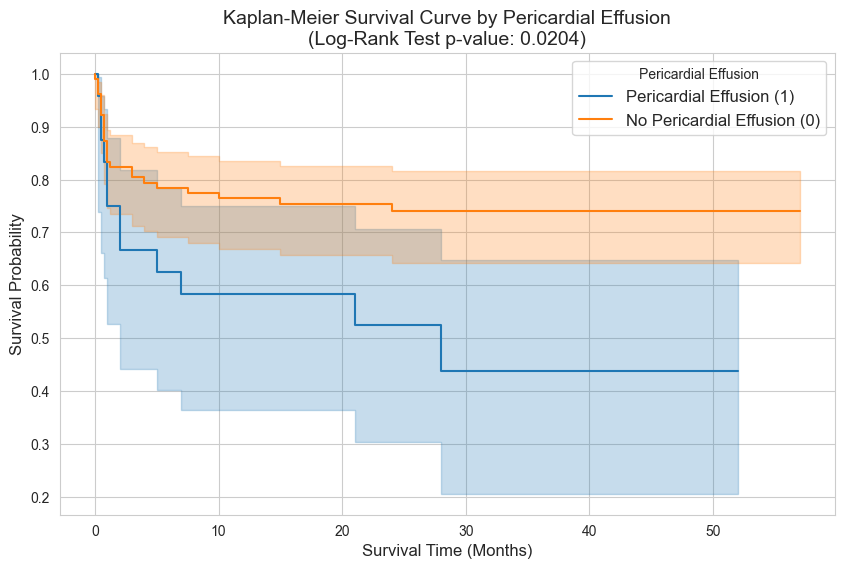

In [31]:
# Plotting the Kaplan-Meier curve with the Log-Rank test results
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

# Fit and plot for patients with pericardial effusion
kmf.fit(durations_effusion, event_observed=event_effusion, label="Pericardial Effusion (1)")
kmf.plot()

# Fit and plot for patients without pericardial effusion
kmf.fit(durations_no_effusion, event_observed=event_no_effusion, label="No Pericardial Effusion (0)")
kmf.plot()

# Add Log-Rank Test results
plt.title("Kaplan-Meier Survival Curve by Pericardial Effusion\n(Log-Rank Test p-value: {:.4f})".format(logrank_results.p_value), fontsize=14)
plt.xlabel("Survival Time (Months)", fontsize=12)
plt.ylabel("Survival Probability", fontsize=12)
plt.legend(title="Pericardial Effusion", loc="upper right", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


**Key Findings**
- Patients with **pericardial effusion (blue curve)** have a significantly lower survival probability over time compared to those without it (orange curve).
- The **log-rank test p-value = 0.0204**, indicating a statistically significant difference in survival between the two groups.
- The initial survival drop is steep in both groups, but **patients with pericardial effusion experience worse long-term survival**.
- The confidence interval (shaded regions) is wider at later time points, reflecting increased uncertainty due to fewer patients at risk.

**Conclusion**
- **Pericardial effusion is associated with worse survival outcomes**, and the statistical test confirms the difference is unlikely due to chance.


### Task 7: Answer the Formulated Question
1. **Answer your research question**: Based on the analyses, determine whether you can answer the question you formulated in Task 2
2. **Explain the findings**: If you can answer the question, explain how the analysis led to the conclusion. If not, continue refining the analysis until you can answer the question.


**Research Question:**

1. **Answer your research question**:  
   Based on the analyses, we can answer the research question: *Does the presence of pericardial effusion (fluid around the heart) impact survival time after a heart attack?*

   The Kaplan-Meier survival curves show a clear difference in survival probabilities between patients with and without pericardial effusion. The curve for patients with pericardial effusion declines more steeply, indicating lower survival probabilities over time compared to patients without pericardial effusion. This suggests that pericardial effusion is associated with a poorer survival outcome after a heart attack.

   Furthermore, the results of the Log-Rank test provide statistical evidence supporting this conclusion. The p-value from the Log-Rank test is **0.020383**, which is below the typical threshold of 0.05. This indicates that there is a statistically significant difference in survival between the two groups, with pericardial effusion being associated with lower survival.

2. **Explain the findings**:  
   The analysis supports the hypothesis that the presence of pericardial effusion negatively impacts survival time after a heart attack. The Kaplan-Meier curves show that patients with pericardial effusion have a lower survival probability over time. This is further confirmed by the Log-Rank test, which provides statistical evidence of a significant difference between the two groups.

   Since the p-value from the Log-Rank test is less than 0.05, we reject the null hypothesis that there is no difference in survival between the two groups. This suggests that the presence of pericardial effusion has a measurable effect on survival, supporting the conclusion that it impacts survival time after a heart attack.

Thus, we can confidently answer the research question with the evidence from the Kaplan-Meier survival analysis and the Log-Rank test.
